In [8]:
#importacion de librerias
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

Se llama a la funcion del codigo encapsulado

In [4]:
#importacion de funcion creada para limpieza de datos
from funcion import limpiar_Dframe

    Titulos de las columnas df1
Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')
                                date      num_code
count                          93487  93487.000000
mean   2022-03-07 17:48:16.458331136    780.056147
min              2022-02-11 00:00:00    401.000000
25%              2022-02-24 00:00:00    706.000000
50%              2022-03-08 00:00:00    820.000000
75%              2022-03-20 00:00:00    874.000000
max              2022-03-31 00:00:00    996.000000
std                              NaN    147.616038
date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                 object
dtype: object
Vacios date          0
airli

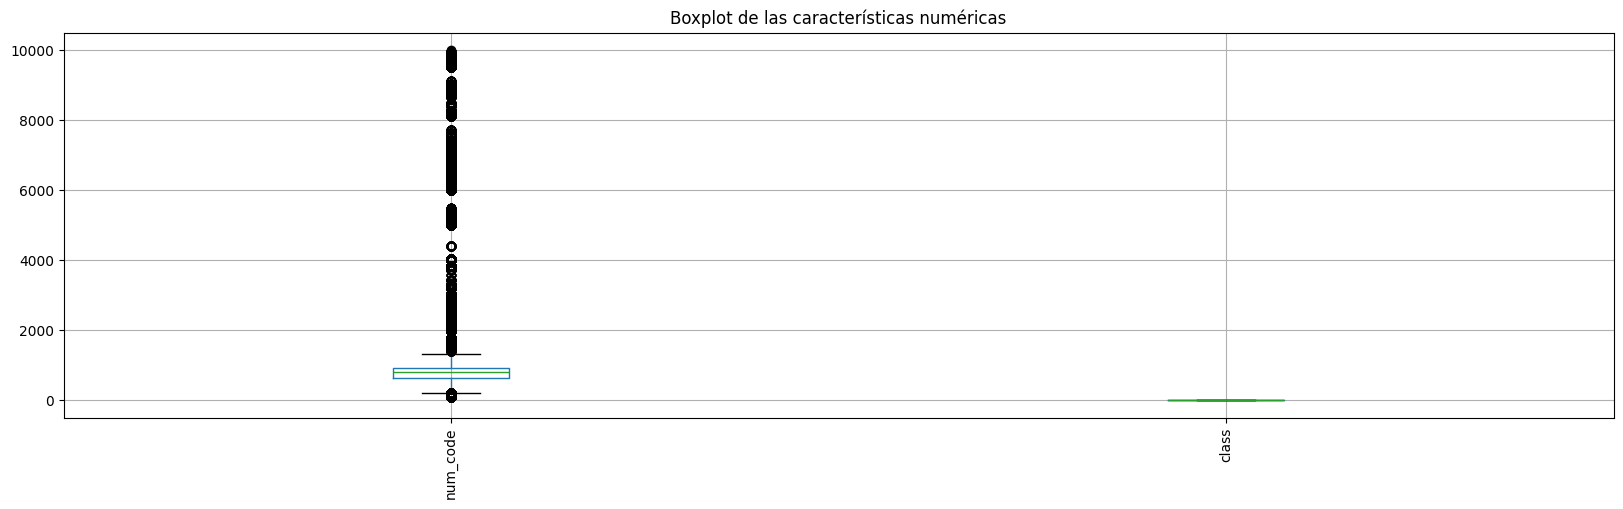

ANALISIS UNIVARIADO
               price  total_time_taken
count  300149.000000     300149.000000
mean    20853.529427        733.019867
std     22643.254825        431.596972
min      1105.000000         50.000000
25%      4783.000000        405.000000
50%      7425.000000        675.000000
75%     42521.000000        970.000000
max     99680.000000       2990.000000


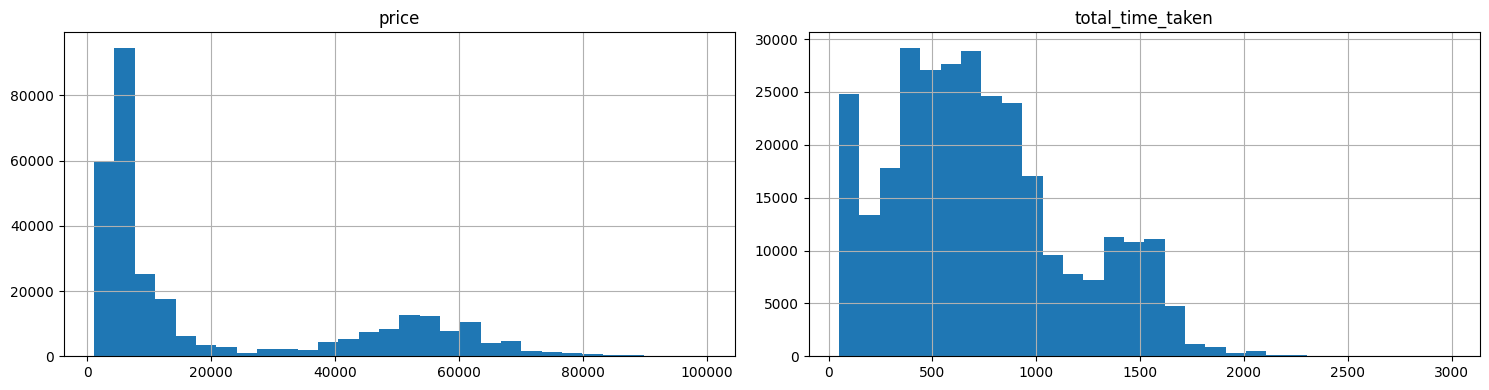

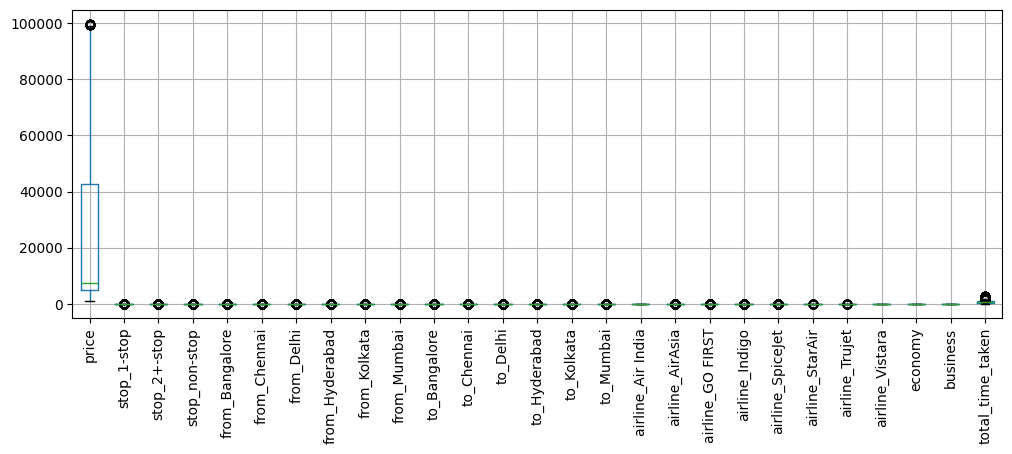

Analisis bivariado


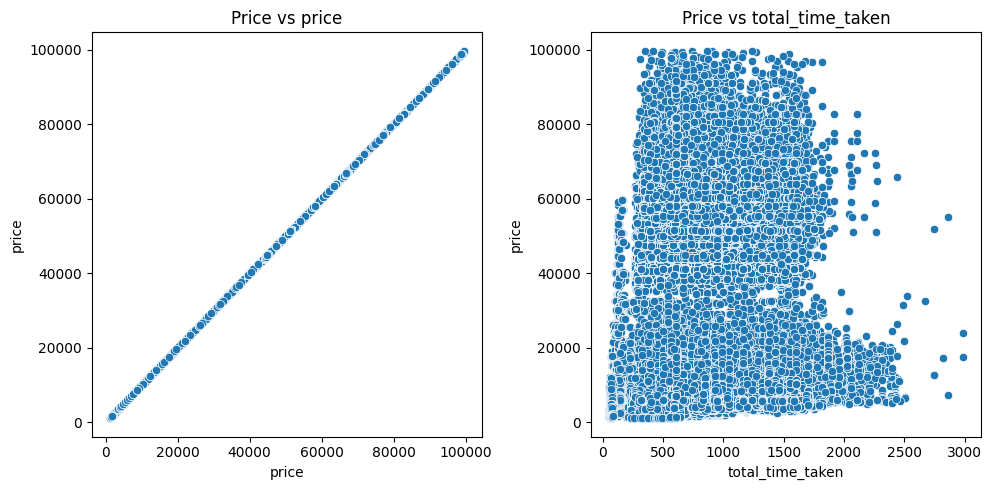

TOP correlaciones con Price:
price                1.000000
business             0.938598
airline_Vistara      0.360387
total_time_taken     0.204525
stop_1-stop          0.200827
airline_Air India    0.071171
to_Kolkata           0.020985
to_Chennai           0.018716
from_Chennai         0.018663
from_Kolkata         0.015679
to_Bangalore         0.013744
from_Mumbai          0.013291
from_Bangalore       0.012080
to_Mumbai            0.010620
Name: price, dtype: float64
Variables seleccionadas metodo FORWARD SELECTION: Index(['stop_1-stop', 'stop_2+-stop', 'from_Bangalore', 'from_Chennai',
       'from_Delhi', 'from_Hyderabad', 'from_Kolkata', 'from_Mumbai',
       'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai', 'airline_Air India', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'economy', 'business',
       'total_time_taken'],
      dtype='

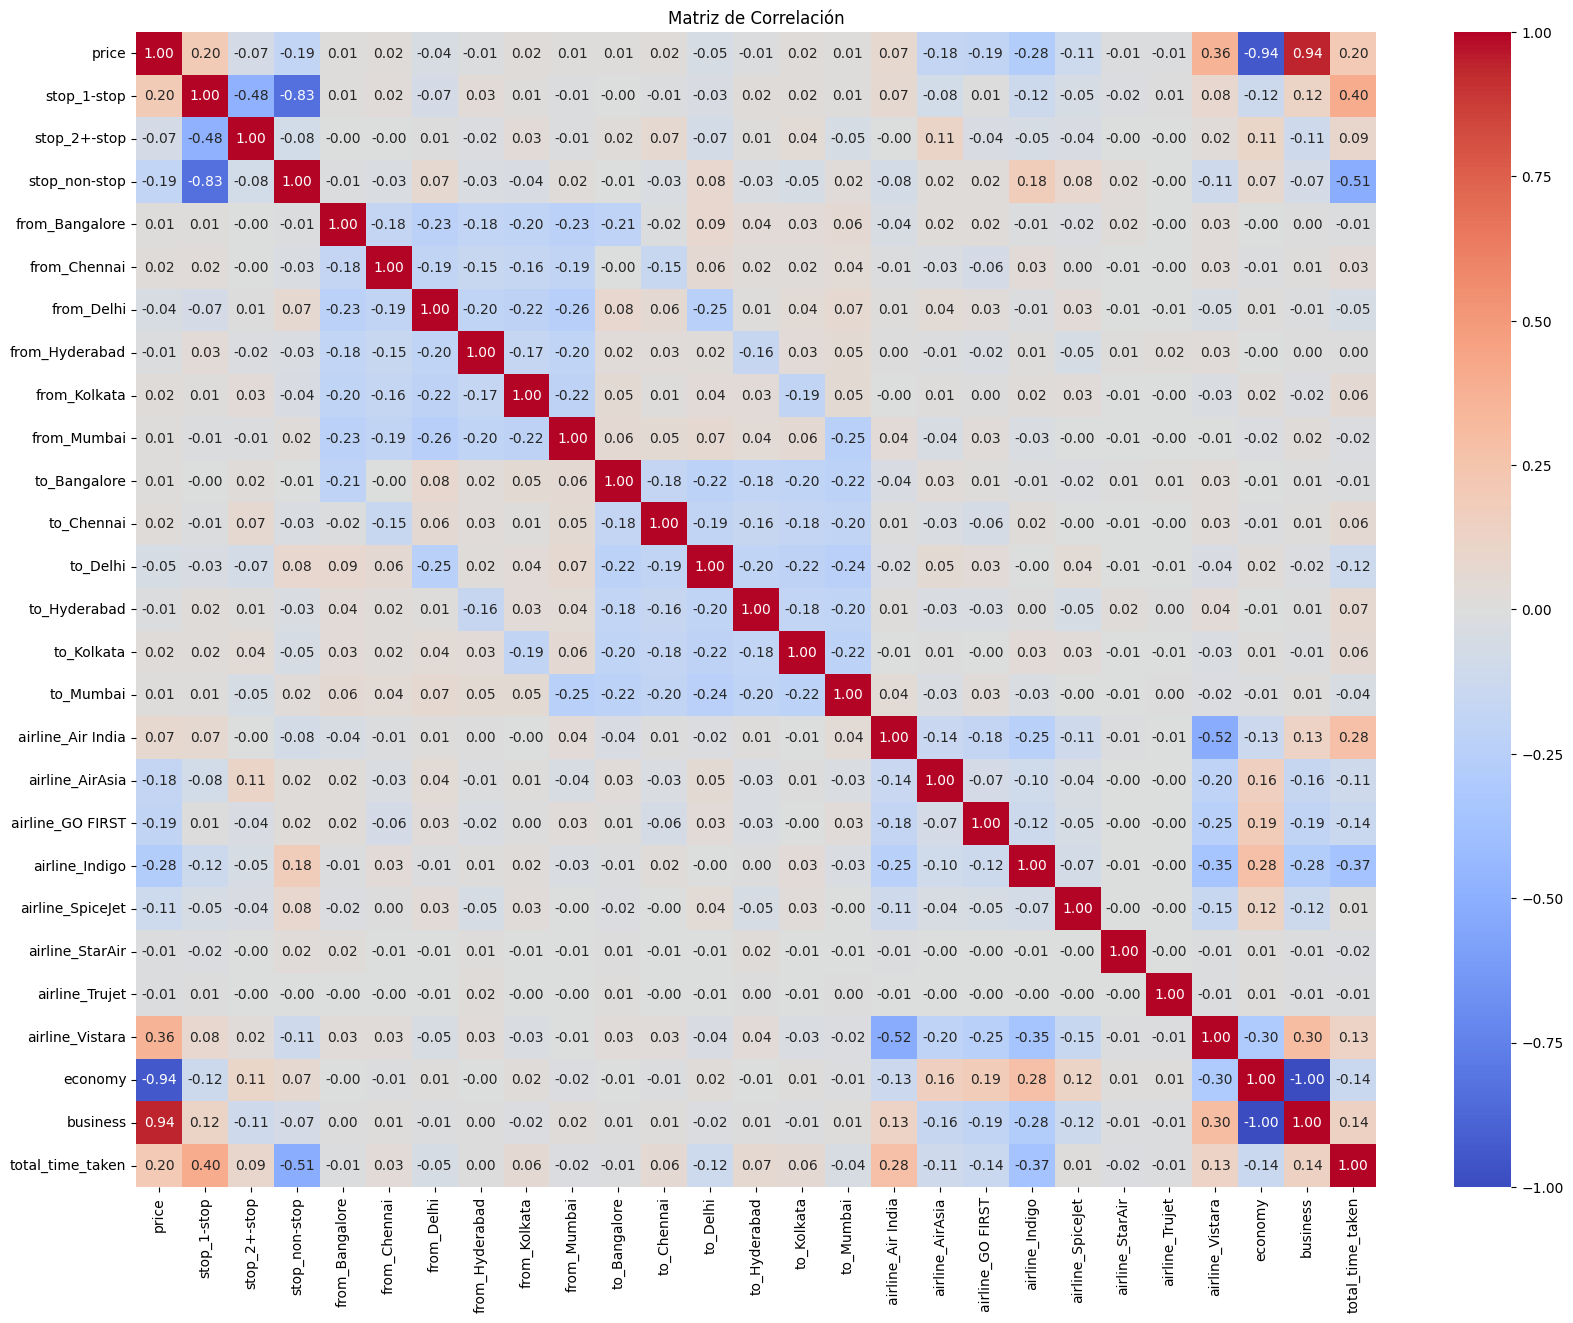

Fuera función:


,stop_1-stop,stop_2+-stop,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,economy,business,total_time_taken,price
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,120.0,25612
1,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,135.0,25612
2,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,1485.0,42220
3,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,1590.0,44450
4,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,400.0,46690


In [5]:
#importacion de datos y limpieza con la funcion creada
dfModel = limpiar_Dframe('business.xlsx', 'economy.xlsx')
print("Fuera función:")
dfModel.head()

7. Elige al menos 3 modelos candidatos para resolver el problema. A partir de esto, genera un conjunto de entrenamiento y prueba, para luego entrenar los diferentes modelos.

In [6]:

#preparacion de datos
X = dfModel.drop(columns=['price'])
y = dfModel['price']

#datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


8. Elige una grilla de hiperparametros y luego optimízalos, buscando la mejor combinación para cada grilla. Guardar los modelos entrenados.

In [9]:
#lasso regression

lasso_pipe = Pipeline([('scaler', StandardScaler()), ('model', Lasso(random_state=42, tol=0.01))])
#grilla de parametros
lasso_params = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_pipe, lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1 )
lasso_grid.fit(X_train, y_train)

lasso_import = np.abs(lasso_grid.best_estimator_.named_steps['model'].coef_)
Categorias = X_train.columns
y_pred_lasso = lasso_grid.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Mejor alpha encontrado para lasso:", lasso_grid.best_params_)



Mejor alpha encontrado para lasso: {'model__alpha': 0.01}


In [10]:
#xgboost regression
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
#grilla de parametros
xgb_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 6], 'min_child_weight': [1, 3, 5]}
xgb_reg = XGBRegressor(random_state=42, eval_metric='logloss')
xgb_grid = GridSearchCV( xgb, xgb_params, cv=5, scoring='neg_mean_squared_error' )
xgb_grid.fit(X_train, y_train)
xgb_import = xgb_grid.best_estimator_.feature_importances_
y_pred_xgb = xgb_grid.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("Mejor parametro encontrado para XGBoost:", xgb_grid.best_params_)

Mejor parametro encontrado para XGBoost: {'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 150}


In [16]:
#random forest regression
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
#grilla de parametros
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_reg = RandomForestRegressor(random_state=42)
#rf_grid = GridSearchCV( rf_reg, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1 )
rf_grid = RandomizedSearchCV( rf_reg, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, n_iter=10, random_state=42 )
rf_grid.fit(X_train, y_train)

rf_import = rf_grid.best_estimator_.feature_importances_
y_pred_rf = rf_grid.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Mejor parametro encontrado para Random Forest:", rf_grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor parametro encontrado para Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


9. Define al menos 3 métricas para evaluar los modelos entrenados y genera gráficos de comparación. Elige un baseline para ver qué tan buena es tu opción respecto a ese baseline y concluye.

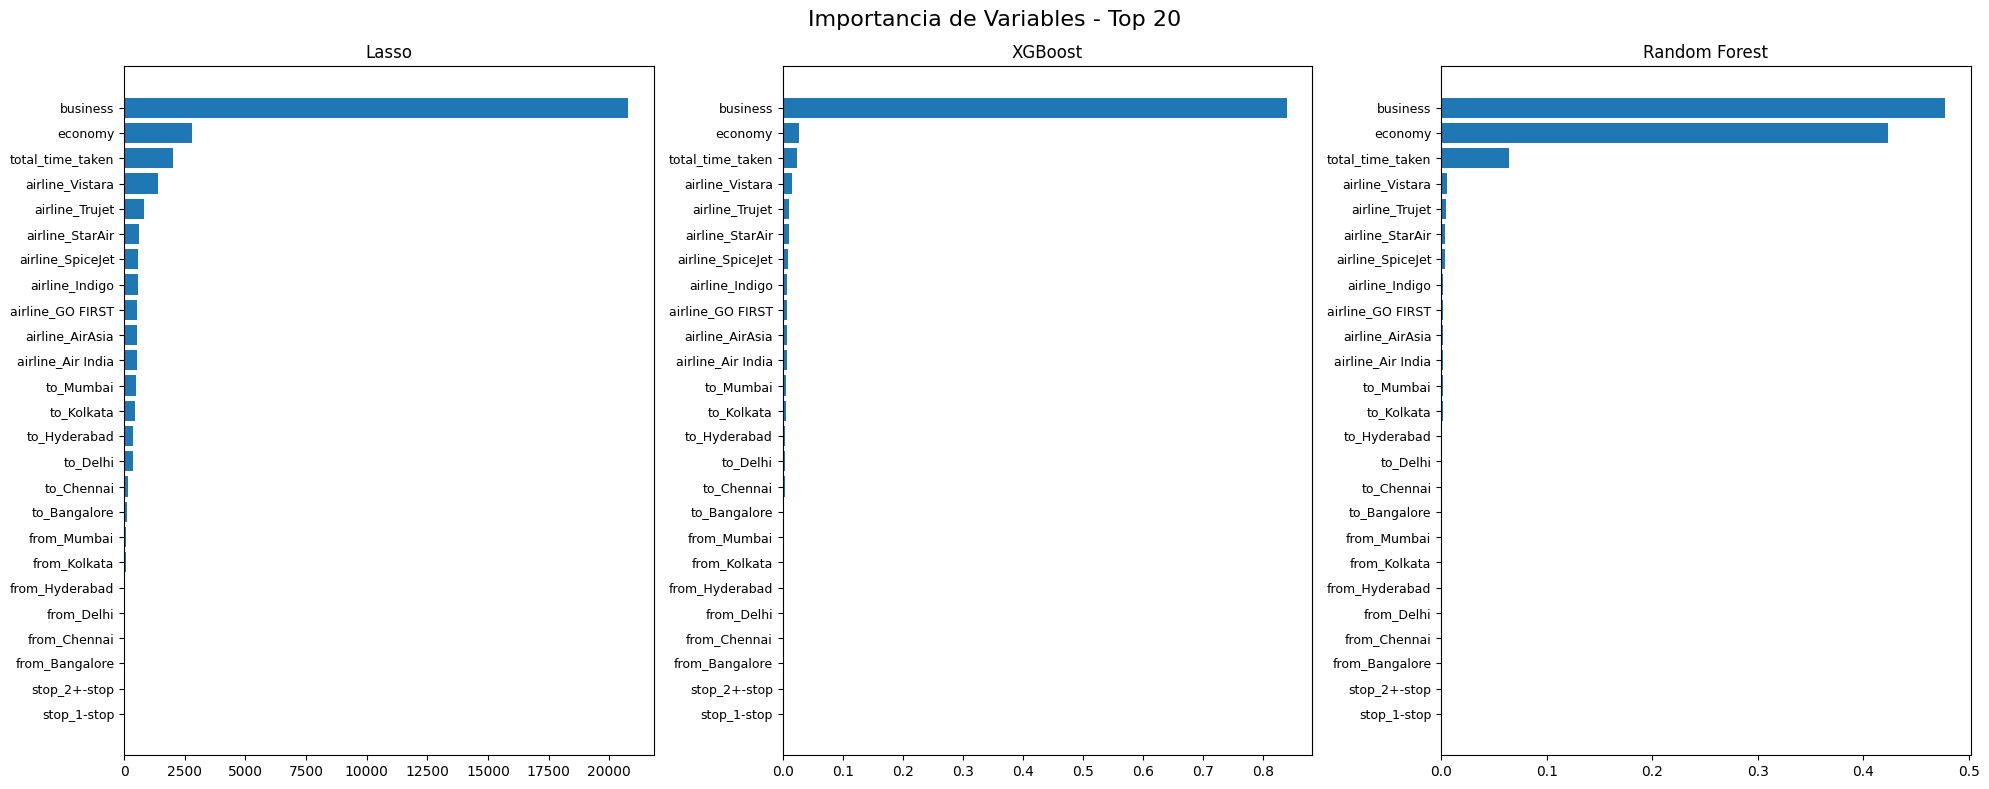

Comparativa de modelos:

Lasso Regression ->          MSE: 48474341.61,      R2: 0.91,       MAE: 4854.13
XGBoost Regression ->        MSE: 17157444.00,      R2: 0.97,       MAE: 2749.66
Random Forest Regression ->  MSE: 13382907.58,      R2: 0.97,       MAE: 2288.20
Indicador Lasso Regression: 3.8478
Indicador XGBoost Regression: 20.4868
Indicador Random Forest Regression: 31.8023


In [ ]:
# Convertir todos a formato compatible
categorias_lista = X.columns.tolist()
lasso_import_np = np.array(lasso_import)
xgb_import_np = np.array(xgb_import) 
rf_import_np = np.array(rf_import)

# DataFrames ordenados
df_lasso = pd.DataFrame({'Categoria': categorias_lista, 'Importancia': lasso_import_np}).sort_values('Importancia', ascending=False).head(30)
df_xgb = pd.DataFrame({'Categoria': categorias_lista, 'Importancia': xgb_import_np}).sort_values('Importancia', ascending=False).head(30)
df_rf = pd.DataFrame({'Categoria': categorias_lista, 'Importancia': rf_import_np}).sort_values('Importancia', ascending=False).head(30)

# 3 gráficos juntos
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Importancia de Variables - Top 20', fontsize=16)

for i, (df, title) in enumerate([(df_lasso, 'Lasso'), (df_xgb, 'XGBoost'), (df_rf, 'Random Forest')]):
    axes[i].barh(df['Categoria'].tolist(), df['Importancia'].tolist())
    axes[i].set_title(title)
    axes[i].invert_yaxis()
    axes[i].tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()

#creo un indicador donde considero todas las METRICAS
ind_lasso = ((r2_lasso ) / (mse_lasso * mae_lasso))*1000000000000
ind_XGBoost = ( (r2_xgb ) / (mse_xgb * mae_xgb))*1000000000000
ind_Random = (  (r2_rf) / (mse_rf * mae_rf))*1000000000000

#COMPARATIVA DE MODELOS
print("Comparativa de modelos:\n")
print(f"Lasso Regression ->          MSE: {mse_lasso:.2f},      R2: {r2_lasso:.2F},       MAE: {mae_lasso:.2F}")
print(f"XGBoost Regression ->        MSE: {mse_xgb:.2f},      R2: {r2_xgb:.2F},       MAE: {mae_xgb:.2F}")
print(f"Random Forest Regression ->  MSE: {mse_rf:.2f},      R2: {r2_rf:.2F},       MAE: {mae_rf:.2F}")

#CREACION DE INDICADOR GENERAL DE LOS MODELOS
print(f"Indicador Lasso Regression: {ind_lasso:.4f}")
print(f"Indicador XGBoost Regression: {ind_XGBoost:.4f}")
print(f"Indicador Random Forest Regression: {ind_Random:.4f}")

10. Genera una conclusión final respecto a qué tan útiles son los resultados encontrados para resolver el problema propuesto y define cuáles podrían ser los próximos pasos para el proyecto.

R/.
Con respecto a la comparacion el modelo que mejor puede funcionar es Forest regression al tener un indicador general mayor de 31.8023, esto implica que tiene un error promedio en proporcion  mas bajo y errores mas pequeños en la misma proporcion.
***En random forest determina que las mejores variables son la clase y el tiempo requerido para cada viaje, creo personalmente que es bastanta logico, seguido por la aero linea pues dependiendo de la empresa tiene un cobro mayor.

Se estima entonces trabajar con las varables mas representativas las primeras 11, pues incluirian todas la aerolineas, la clase y el tiempo de recorido, lo que se procederia es que con el modelo de Random Forest se aoptaria para estimar el valor de un pasaje, dependiendo el top de variables encontradas.

Probar el modelo para predecir el precio de un destino, ejemplo

In [29]:
#predecir valor
entrada_array = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1200]).reshape(1, -1)

prediccion = rf_grid.predict(entrada_array)
resultado = prediccion[0]

print(f"El precio para 2 escalas, saliendo de Hyderabad, llegando a Kolkata, volando en Vistara en clase de negocios,\ncon una duracion de 1200 minutos el precio predicho es: {resultado:.2f}")

El precio para 2 escalas, saliendo de Hyderabad, llegando a Kolkata, volando en Vistara en clase de negocios,
con una duracion de 1200 minutos el precio predicho es: 69273.39


/home/AND/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
